<a href="https://colab.research.google.com/github/MerakiElysian/ML-Assignment/blob/main/classification/Visualization_of_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression on Social Media Ad Data
## This project uses logistic regression to classify whether a user will purchase a product based on social media ad data.

In [ ]:
# Import necessary libraries for data manipulation, analysis, and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set()

In [ ]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('/content/Social_Network_Ads.csv')

# Display the first 5 rows of the DataFrame to get a preview of the data
display(df.head())

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Data Formating

In [ ]:
# Select all columns from the second column onwards to exclude the 'User ID'
model_data = df.iloc[:,1:]

# Display the first 5 rows of the new DataFrame
model_data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
model_data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
model_data.isna().sum()

,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = DeprecationWarning)

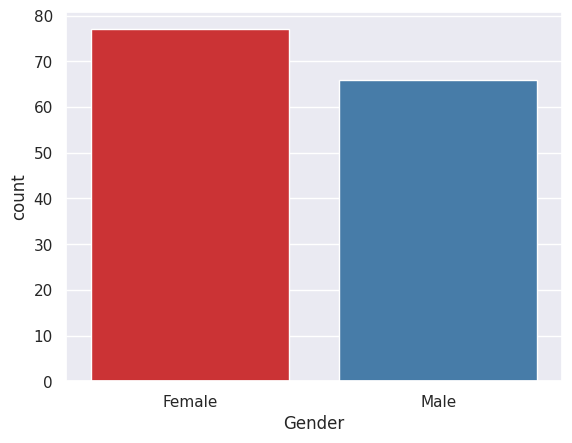

In [ ]:
# Create a countplot to visualize the distribution of 'Gender' for users who purchased the product
sns.countplot(x = "Gender", data = model_data[model_data['Purchased'] == 1], palette="Set1");

In [ ]:
# Map the 'Gender' column from categorical values ('Male', 'Female') to numerical values (1, 0)
model_data["Gender"] = model_data['Gender'].map({'Male':1, 'Female':0})
# Display the count of each unique value in the mapped 'Gender' column
model_data["Gender"].value_counts()

,count
Gender,
0,204
1,196


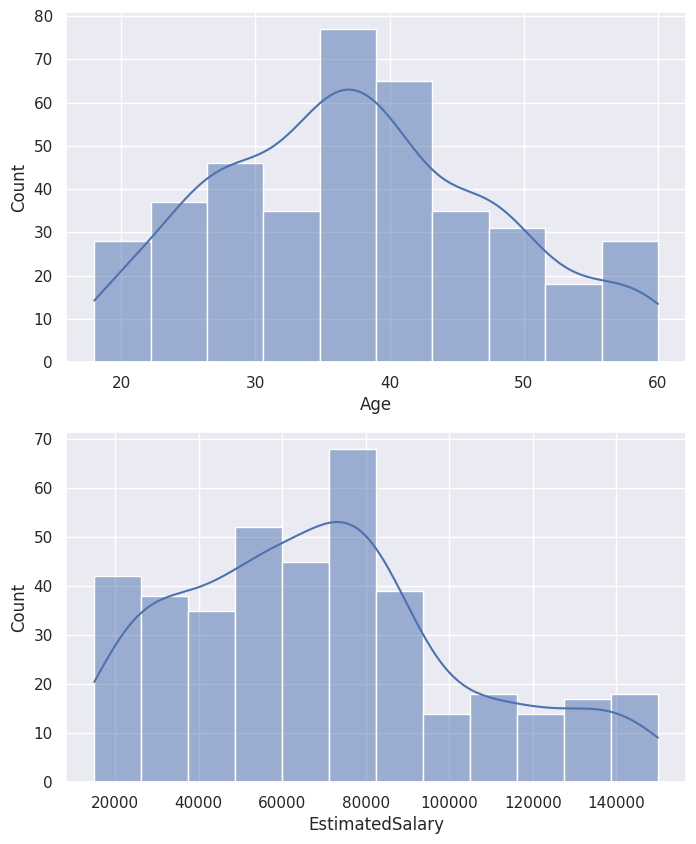

In [ ]:
# Create a figure and a set of subplots with 2 rows and 1 column for the histograms
fig, axes = plt.subplots(nrows =2, ncols=1, figsize=(8,10))
# Flatten the axes array to easily iterate through the subplots
axes = axes.flatten()
# Iterate through the 'Age' and 'EstimatedSalary' columns
for i, v in enumerate(['Age', 'EstimatedSalary']):
  # Create a histogram with a kernel density estimate for each column in the respective subplot
  sns.histplot(data = model_data, x = v, kde = True, ax = axes[i])

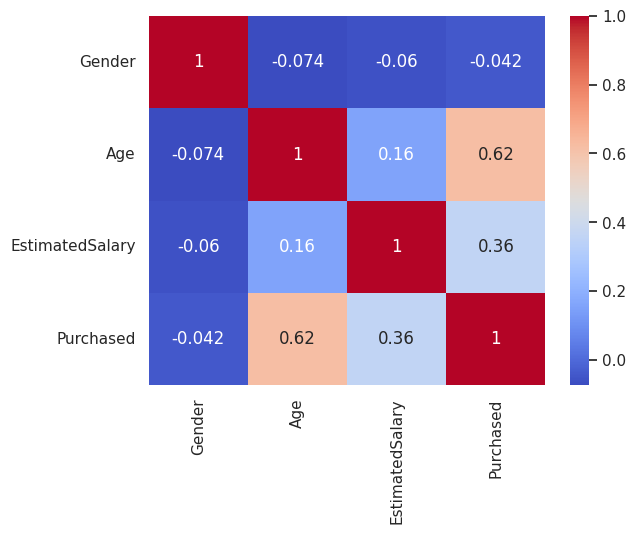

In [ ]:
sns.heatmap(model_data.corr(), cmap = 'coolwarm', annot = True);
plt.show()

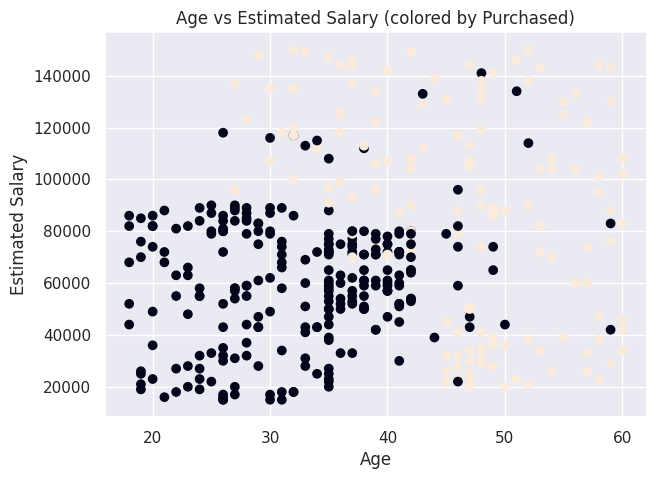

In [ ]:
# Check if 'Age' and 'EstimatedSalary' columns exist in the original DataFrame 'df'
if 'Age' in df.columns and 'EstimatedSalary' in df.columns:
    # Create a new figure for the scatter plot
    plt.figure(figsize=(7,5))
    # Check if the 'Purchased' column exists in the original DataFrame 'df'
    if 'Purchased' in df.columns:
        # Create a scatter plot of 'Age' vs 'EstimatedSalary' and color the points based on the 'Purchased' column
        plt.scatter(df['Age'], df['EstimatedSalary'], c=df['Purchased'])
        # Set the title of the plot
        plt.title('Age vs Estimated Salary (colored by Purchased)')
    else:
        # Create a scatter plot of 'Age' vs 'EstimatedSalary' without coloring
        plt.scatter(df['Age'], df['EstimatedSalary'])
        # Set the title of the plot
        plt.title('Age vs Estimated Salary')
    # Set the label for the x-axis
    plt.xlabel('Age')
    # Set the label for the y-axis
    plt.ylabel('Estimated Salary')
    # Display the plot
    plt.show()
else:
    # If the required columns are not found, print an informative message
    print('Required columns not found.')

In [ ]:
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph, representing users
for index, row in df.iterrows():
    G.add_node(row['User ID'], purchased=row['Purchased'], gender=row['Gender'], age=row['Age'], estimated_salary=row['EstimatedSalary'])

# Add edges between users who have the same 'Purchased' status
purchased_users = df[df['Purchased'] == 1]['User ID'].tolist()
not_purchased_users = df[df['Purchased'] == 0]['User ID'].tolist()

# Add edges for users who purchased
for i in range(len(purchased_users)):
    for j in range(i + 1, len(purchased_users)):
        G.add_edge(purchased_users[i], purchased_users[j])

# Add edges for users who did not purchase
for i in range(len(not_purchased_users)):
    for j in range(i + 1, len(not_purchased_users)):
        G.add_edge(not_purchased_users[i], not_purchased_users[j])

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 400
Number of edges: 43049


In [ ]:
# Implement and perform DFS traversal
print("DFS Traversal:")
dfs_nodes = list(nx.dfs_tree(G, source=df['User ID'].iloc[0]).nodes())
print(dfs_nodes)

# Implement and perform BFS traversal
print("BFS Traversal:")
bfs_nodes = list(nx.bfs_tree(G, source=df['User ID'].iloc[0]).nodes())
print(bfs_nodes)

DFS Traversal:
[np.int64(15624510), 15810944, 15668575, 15603246, 15804002, 15728773, 15598044, 15600575, 15727311, 15570769, 15606274, 15746139, 15704987, 15628972, 15697686, 15744529, 15669656, 15581198, 15573452, 15776733, 15724858, 15713144, 15690188, 15689425, 15671766, 15782806, 15764419, 15591915, 15772798, 15792008, 15715541, 15639277, 15798850, 15776348, 15793813, 15694395, 15764195, 15744919, 15671655, 15654901, 15649136, 15775562, 15807481, 15642885, 15789109, 15814004, 15673619, 15595135, 15605000, 15718071, 15679760, 15654574, 15577178, 15595324, 15756932, 15726358, 15595228, 15782530, 15592877, 15746737, 15774179, 15667265, 15655123, 15595917, 15668385, 15709476, 15711218, 15798659, 15694946, 15631912, 15768816, 15682268, 15684801, 15636428, 15809823, 15699284, 15786993, 15709441, 15710257, 15575694, 15756820, 15766289, 15593014, 15584545, 15672091, 15801658, 15706185, 15789863, 15720943, 15697997, 15665416, 15660200, 15619653, 15773447, 15739160, 15689237, 15679297, 1559

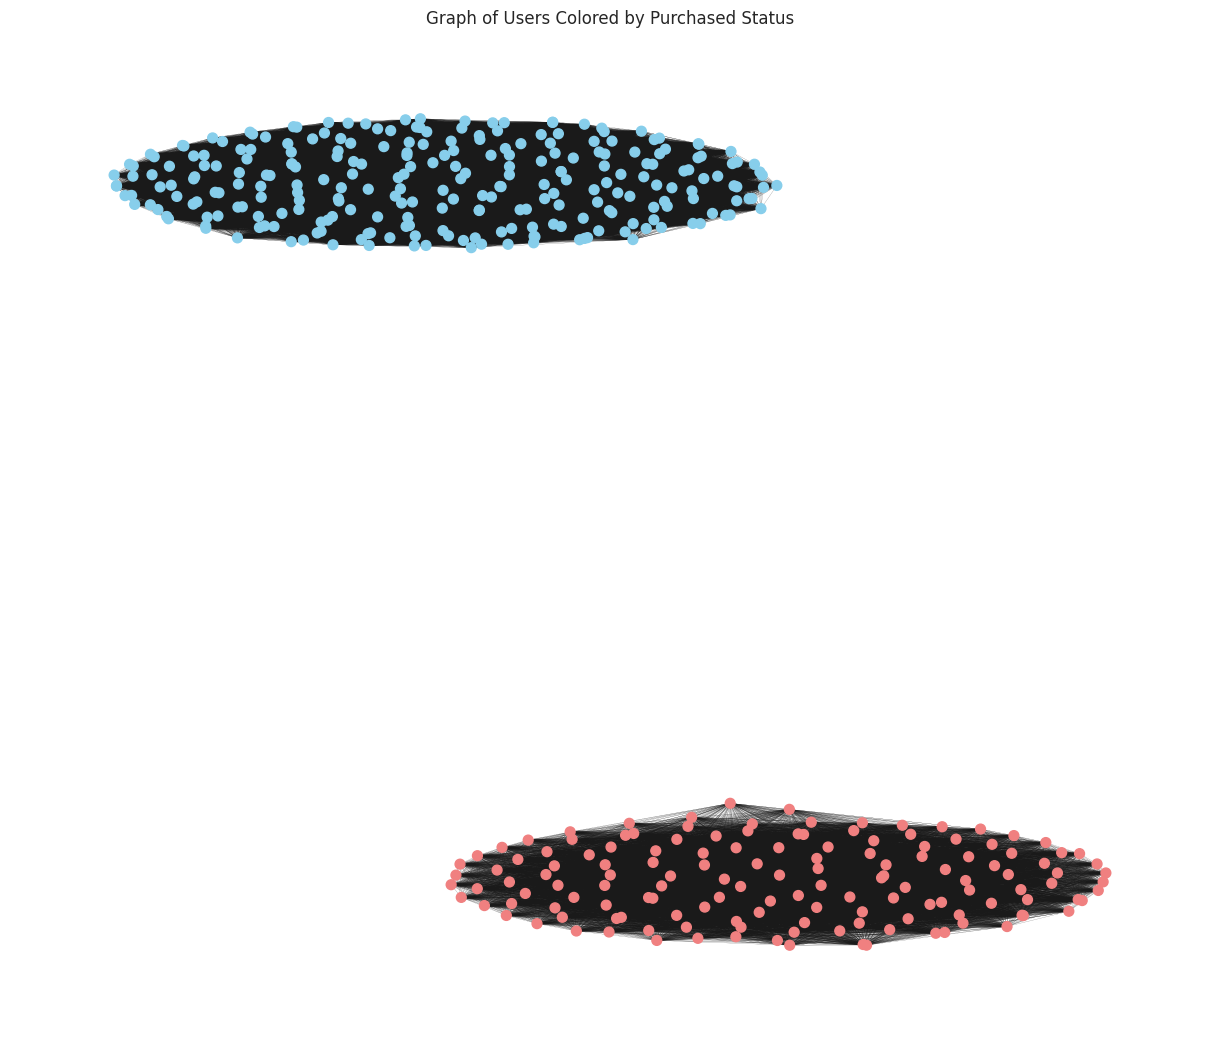

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Define node colors based on the 'Purchased' attribute
node_colors = ['skyblue' if data['purchased'] == 0 else 'lightcoral' for node, data in G.nodes(data=True)]

# Draw the graph (using a spring layout for better visualization)
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.1) # k regulates the distance between nodes
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=50, width=0.1)
plt.title('Graph of Users Colored by Purchased Status')
plt.show()

Number of nodes in Male graph: 50
Number of edges in Male graph: 636
Number of nodes in Female graph: 50
Number of edges in Female graph: 649


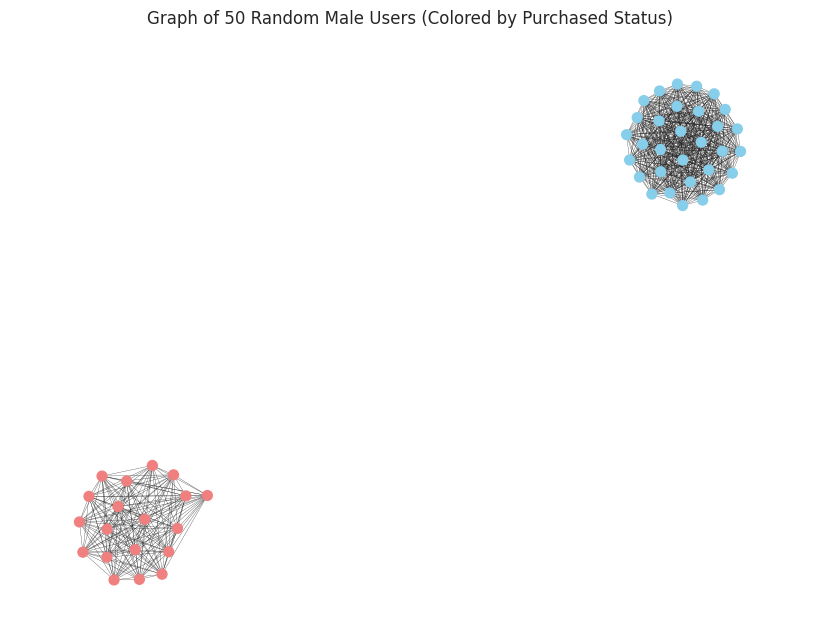

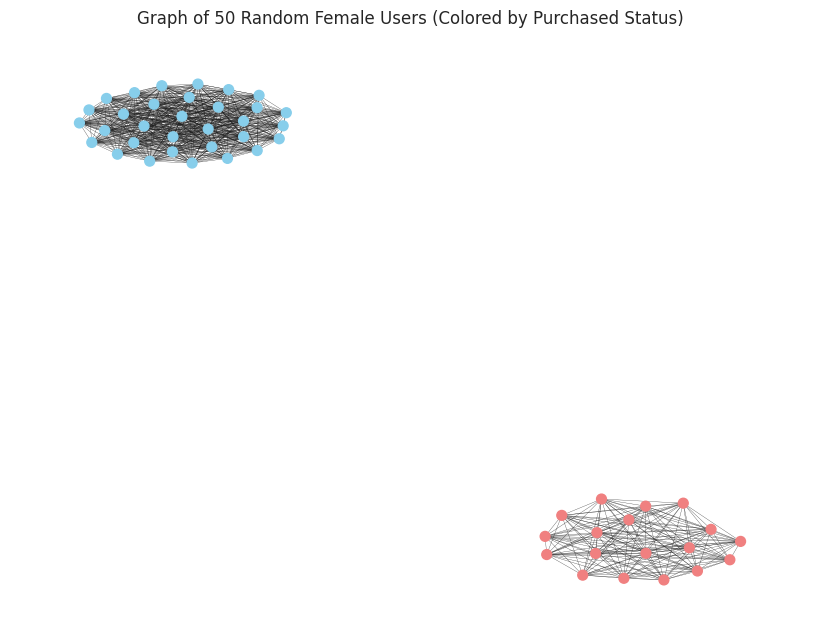

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Separate data by gender
male_df = df[df['Gender'] == 'Male'].copy()
female_df = df[df['Gender'] == 'Female'].copy()

# Sample 50 random users from each gender
male_sample = male_df.sample(n=min(50, len(male_df)), random_state=42)
female_sample = female_df.sample(n=min(50, len(female_df)), random_state=42)

# Create graphs for male and female samples
G_male = nx.Graph()
for index, row in male_sample.iterrows():
    G_male.add_node(row['User ID'], purchased=row['Purchased'], age=row['Age'], estimated_salary=row['EstimatedSalary'])

for i in range(len(male_sample)):
    for j in range(i + 1, len(male_sample)):
        if male_sample.iloc[i]['Purchased'] == male_sample.iloc[j]['Purchased']:
            G_male.add_edge(male_sample.iloc[i]['User ID'], male_sample.iloc[j]['User ID'])

G_female = nx.Graph()
for index, row in female_sample.iterrows():
    G_female.add_node(row['User ID'], purchased=row['Purchased'], age=row['Age'], estimated_salary=row['EstimatedSalary'])

for i in range(len(female_sample)):
    for j in range(i + 1, len(female_sample)):
        if female_sample.iloc[i]['Purchased'] == female_sample.iloc[j]['Purchased']:
            G_female.add_edge(female_sample.iloc[i]['User ID'], female_sample.iloc[j]['User ID'])

print(f"Number of nodes in Male graph: {G_male.number_of_nodes()}")
print(f"Number of edges in Male graph: {G_male.number_of_edges()}")
print(f"Number of nodes in Female graph: {G_female.number_of_nodes()}")
print(f"Number of edges in Female graph: {G_female.number_of_edges()}")

# Visualize the male graph
plt.figure(figsize=(8, 6))
pos_male = nx.spring_layout(G_male, k=0.5)
node_colors_male = ['skyblue' if data['purchased'] == 0 else 'lightcoral' for node, data in G_male.nodes(data=True)]
nx.draw(G_male, pos_male, with_labels=False, node_color=node_colors_male, node_size=50, width=0.2)
plt.title('Graph of 50 Random Male Users (Colored by Purchased Status)')
plt.show()

# Visualize the female graph
plt.figure(figsize=(8, 6))
pos_female = nx.spring_layout(G_female, k=0.5)
node_colors_female = ['skyblue' if data['purchased'] == 0 else 'lightcoral' for node, data in G_female.nodes(data=True)]
nx.draw(G_female, pos_female, with_labels=False, node_color=node_colors_female, node_size=50, width=0.2)
plt.title('Graph of 50 Random Female Users (Colored by Purchased Status)')
plt.show()